# To-do's
* Plot ACFs for the states at each membership cutoffs
* Plot the resulting implied rates on paired axes?
    * Plot the resulting MFPTs on paired axes?
* 



In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks', {'font.sans-serif': ['DejaVu Sans']})

In [3]:
from simtk import unit

# 1. Define the range of lag-times for each system

## 1.1. Define the time unit between trajectory snapshots

In [44]:
dt = 0.0002 * unit.microseconds
dt_in_us = (dt / unit.microseconds)
dt_in_us

0.0002

# 1.2. Define the max lag time of interest

In [153]:
max_lag_time = 5000 * unit.nanoseconds
max_lag_ind = int(max_lag_time / dt)
max_lag_ind

25000

In [10]:
# download these from Github too
chignolin_membs = np.load('chignolin_lag150ns_metastable_memberships.npy')

villin_membs = np.load('villin_lag100ns_metastable_memberships_3states.npy')
villin_misfold = np.load('villin_misfold.npy')

trpcage_membs = np.load('trpcage_lag100ns_metastable_memberships.npy')

ntl9_membs = np.load('ntl9_lag200ns_metastable_memberships.npy')

In [11]:
print([x.shape for x in [chignolin_membs, villin_membs, trpcage_membs, ntl9_membs
                        ]])

[(100, 2), (100, 3), (100, 2), (100, 2)]


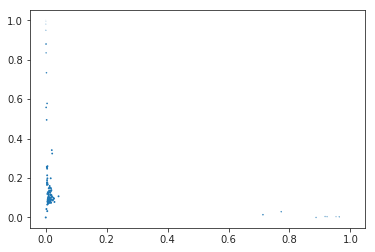

In [12]:
plt.scatter(*villin_membs.T)

In [13]:
# all systems 100 microstates

In [14]:
# * Chignolin

# State 0 unfolded is at 20.9% population
# State 1 is folded at 79.1% population

# * Villin

# State 0 is misfolded at 5.7% population
# State 1 is folded at 33.1% population
# State 2 is unfolded at 61.2% population

# * Trp-cage

# State 0 is folded at 20.4% population
# State 1 is unfolded at 79.6% population

# * NTL9

# State 0 is unfolded at 15.0% population
# State 1 is folded at 85.0% population

In [15]:
# get sets

In [16]:
# returns [[folded], [unfolded], [intermediate]]
def get_sets(cutoff):
    chignolin_sets = [np.concatenate(np.argwhere(chignolin_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(chignolin_membs[:,0] >= cutoff)), []]
    
    for i in range(100):
        if i not in chignolin_sets[0] and i not in chignolin_sets[1]:
            chignolin_sets[2].append(i)
    
    villin_sets = [np.concatenate(np.argwhere(villin_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(villin_membs[:,2] >= cutoff)), []]
    
    for i in range(100):
        if i not in villin_sets[0] and i not in villin_sets[1] and i not in villin_misfold:
            villin_sets[2].append(i)

    trpcage_sets = [np.concatenate(np.argwhere(trpcage_membs[:,0] >= cutoff)),
    np.concatenate(np.argwhere(trpcage_membs[:,1] >= cutoff)), []]
    
    for i in range(100):
        if i not in trpcage_sets[0] and i not in trpcage_sets[1]:
            trpcage_sets[2].append(i)

    ntl9_sets = [np.concatenate(np.argwhere(ntl9_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(ntl9_membs[:,0] >= cutoff)), []]
    
    for i in range(100):
        if i not in ntl9_sets[0] and i not in ntl9_sets[1]:
            ntl9_sets[2].append(i)
    
    return (chignolin_sets, villin_sets, trpcage_sets, ntl9_sets)

In [17]:
cutoff = 0.8

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(7, 13, 2, 8)

In [10]:
sets[0][2] # chignolin intermediate

[5, 14, 19, 42, 51, 60, 97]

In [11]:
cutoff = 0.85

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(9, 29, 3, 9)

In [10]:
cutoff = 0.9

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(21, 66, 5, 10)

In [11]:
cutoff = 0.95

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(67, 84, 9, 56)

In [12]:
cutoff = 0.99

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(88, 87, 84, 87)

In [13]:
cutoff = 0.9999

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(98, 89, 98, 95)

In [14]:
#######################

In [15]:
# make cutoff vs. no. of intermediate states plots

In [16]:
def intermediate_size(cutoff):
    chignolin_new_len = [len(np.argwhere(chignolin_membs[:,1] >= cutoff)),
    len(np.argwhere(chignolin_membs[:,0] >= cutoff))]

    villin_new_len = [len(np.argwhere(villin_membs[:,1] >= cutoff)),
    len(np.argwhere(villin_membs[:,2] >= cutoff))]

    trpcage_new_len = [len(np.argwhere(trpcage_membs[:,0] >= cutoff)),
    len(np.argwhere(trpcage_membs[:,1] >= cutoff))]

    ntl9_new_len = [len(np.argwhere(ntl9_membs[:,1] >= cutoff)),
    len(np.argwhere(ntl9_membs[:,0] >= cutoff))]

    return (100-np.sum(chignolin_new_len), 91-np.sum(villin_new_len), 100-np.sum(trpcage_new_len), 100-np.sum(ntl9_new_len))

In [17]:
intermediate_sizes = []

for cutoff in list(np.arange(0.8,1,0.001))+[0.999999]:
    intermediate_sizes.append(intermediate_size(cutoff))

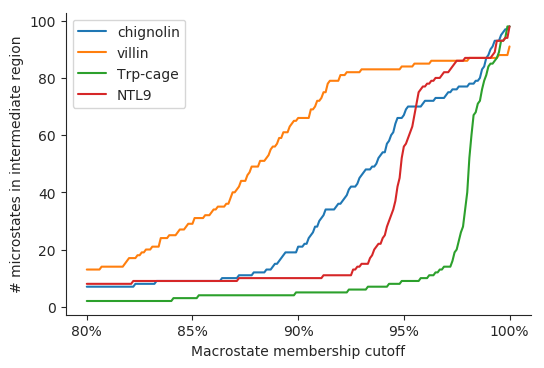

In [18]:
plt.figure(dpi=100)

plt.plot(np.array(intermediate_sizes)[:,0], label='chignolin')
plt.plot(np.array(intermediate_sizes)[:,1], label='villin')
plt.plot(np.array(intermediate_sizes)[:,2], label='Trp-cage')
plt.plot(np.array(intermediate_sizes)[:,3], label='NTL9')

plt.legend()
sns.despine()
plt.xlabel('Macrostate membership cutoff')
plt.xticks([0,50,100,150,200], ['80%', '85%', '90%', '95%', '100%'])
plt.ylabel('# microstates in intermediate region')
plt.show()

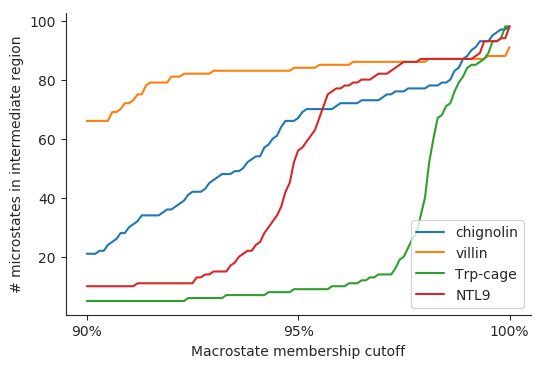

In [19]:
plt.figure(dpi=100)

plt.plot(np.array(intermediate_sizes)[100:,0], label='chignolin')
plt.plot(np.array(intermediate_sizes)[100:,1], label='villin')
plt.plot(np.array(intermediate_sizes)[100:,2], label='Trp-cage')
plt.plot(np.array(intermediate_sizes)[100:,3], label='NTL9')

plt.legend()
sns.despine()
plt.xlabel('Macrostate membership cutoff')
plt.xticks([0,50,100], ['90%', '95%', '100%'])
plt.ylabel('# microstates in intermediate region')
plt.show()

In [12]:
cutoff = 0.9

sets = get_sets(cutoff)

In [17]:
list(map(len, sets))

[3, 3, 3, 3]

In [20]:
len(sets[0][0]), len(sets[0][1]), len(sets[0][2])

(22, 57, 21)

# Get ACF

# Get ACF at different values of the cutoff

# Get rate constant from ACF

John's `compute_implied_rate.m` function

```matlab
function kim_t = compute_implied_rate(x_t, x_ddag, dt, tmax)
% Compute implied rate estimate as a function of observation time.
%
% kim_t = compute_implied_rate(x_t, x_ddag, tmax)
%
% ARGUMENTS
%   x_t - timeseries
%   x_ddag - dividing surface separating A and B states
%   dt - time interval between observations in x_t
%   tmax - maximum lag time to compute implied rate
%
% RETURNS
%   kim_t - implied rate as a function of lag time, up to time tmax

% Determine length of timeseries.
T = length(x_t);

% Quantize using dividing surface to define h_A and h_B functions.
h_A = (x_t <= x_ddag);
h_B = (x_t > x_ddag);

% Compute stationary probabilities.
PA = mean(h_A);
PB = mean(h_B);

% Compute normalized time-correlation function for dh_A.
Cdt = zeros(1,tmax);
dh_A = h_A - PA;
denom = mean(dh_A.*dh_A);
for t = 1:tmax
  Cdt(t) = mean(dh_A(1:T-t) .* dh_A(1+t:T)) / denom;
end
Cdt = [1 Cdt];

% Compute implied rate constant.
tval = [1:tmax] * dt;
kim_t = - tval.^(-1) .* log(Cdt(2:end));

return
```

In [34]:
def compute_implied_rate(h_A, tmax=100):
    """return implied rate constant as function of dt
    
    (h_B is never used: removed)
    """
    
    T = len(h_A)
    if tmax >= T:
        tmax = T - 1
    
    # compute stationary probability
    PA = np.mean(h_A)
    
    # compute normalized time-correlation function for dh_A
    Cdt = np.ones(tmax + 1)
    dh_A = h_A - PA
    denom = np.mean(dh_A**2)
    for t in range(1,tmax):
        Cdt[t] = np.mean(dh_A[:T-t] * dh_A[t:]) / denom
    tval = np.arange(1,tmax+1)
    
    # implied rate constant k at time t
    kim_t = - np.log(Cdt[1:]) / tval
    return kim_t

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


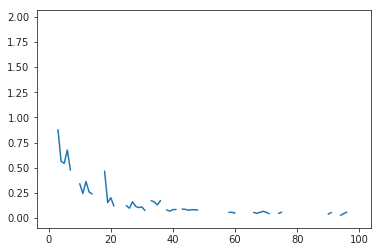

In [38]:
plt.plot(compute_implied_rate(np.random.randn(1000) > 0.1))

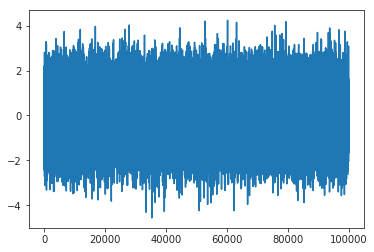

In [84]:
x_t = np.random.randn(100000)
plt.plot(x_t)

In [85]:

h_A = x_t > 0.0
tmax = 100
T = len(h_A)

# compute stationary probability
PA = np.mean(h_A)

# compute normalized time-correlation function for dh_A
Cdt = np.ones(tmax + 1)
dh_A = h_A - PA
denom = np.mean(dh_A**2)
for t in range(1,tmax):
    Cdt[t] = np.mean(dh_A[:T-t-1] * dh_A[t+1:]) / denom
tval = np.arange(1,tmax+1)

# implied rate constant k at time t
kim_t = - np.log(Cdt[1:]) / tval

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


In [26]:
from statsmodels.tsa.stattools import acf

In [94]:
Cdt = acf(h_A, nlags=tmax)

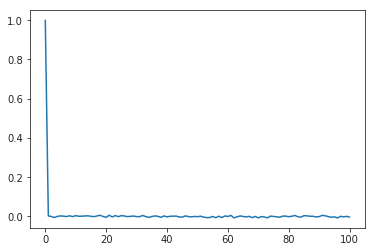

In [96]:
plt.plot(Cdt)

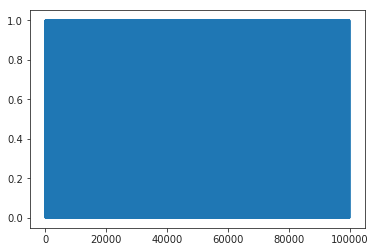

In [86]:
plt.plot(h_A)

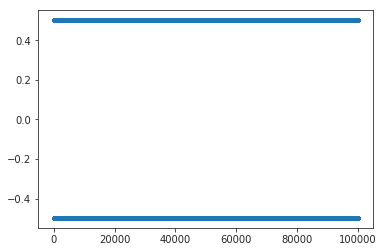

In [87]:
plt.plot(dh_A, '.')

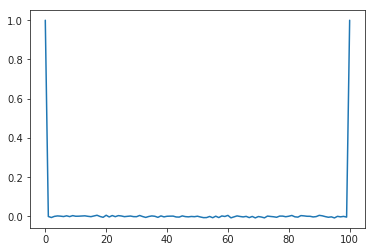

In [88]:
plt.plot(Cdt)

In [89]:
dh_A 

array([ 0.50195,  0.50195,  0.50195, ...,  0.50195,  0.50195, -0.49805])

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


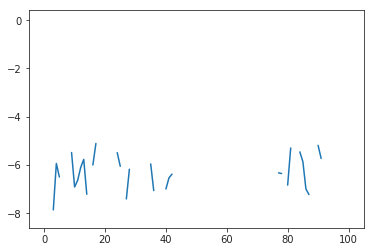

In [90]:
plt.plot(np.log(Cdt))

In [21]:
chignolin_dtrajs = np.load('../chignolin/chignolin_dtrajs_lag10ns.npy')
assert(len(chignolin_dtrajs) == 1)
chignolin_dtraj = chignolin_dtrajs[0]

In [22]:
trpcage_dtrajs = np.load('../trpcage/dtrajs_trpcage_lag10ns.npy')
assert(len(trpcage_dtrajs) == 1)
trpcage_dtraj = trpcage_dtrajs[0]

In [124]:
ntl9_dtrajs = np.load('../ntl9/dtrajs_ntl9_lag10ns.npy')
assert(len(ntl9_dtrajs) == 1)
ntl9_dtraj = ntl9_dtrajs[0]

AssertionError: 

In [126]:
len(ntl9_dtrajs), list(map(len, ntl9_dtrajs))

(3, [5560828, 1945226, 1883599])

In [23]:
dt = 0.2

In [27]:


thresholds = np.array(sorted(chignolin_membs[:,0]))[1:]
tmax = 1000
tval = np.arange(1,tmax+1) * dt

Cdts = []
kim_ts = []
for thresh in thresholds:
    A_inds = np.arange(len(chignolin_membs))[chignolin_membs[:,0] >= thresh]
    h_A = sum([dtrajs[0] == i for i in A_inds]) > 0
    
    Cdt = acf(h_A, nlags=tmax, fft=True)
    kim_t = - np.log(Cdt[1:]) / tval
    kim_ts.append(kim_t)

NameError: name 'dtrajs' is not defined

In [141]:
from tqdm import tqdm
def get_rate_estimates_at_membership_thresholds(dtraj, A_membs, thresholds, dt=0.2, tmax=1000):
    tval = np.arange(1,tmax+1) * dt

    Cdts = []
    kim_ts = []
    
    for thresh in tqdm(thresholds):
        A_inds = np.arange(len(A_membs))[A_membs >= thresh]
        h_A = sum([dtraj == i for i in A_inds]) > 0
        PA = np.mean(h_A)
        PB = 1.0 - PA

        Cdt = acf(h_A, nlags=tmax, fft=True)
        Cdts.append(Cdt)
        kim_t = - PB * np.log(Cdt[1:]) / tval
        kim_ts.append(kim_t)
    return thresholds, tval, Cdts, kim_ts

In [142]:
thresholds = [0.5, 0.8, 0.9, 0.95, 0.99, 0.999]

In [143]:
thresholds, tval, Cdts, kim_ts = get_rate_estimates_at_membership_thresholds(
    dtraj=chignolin_dtrajs[0],
    A_membs=chignolin_membs[:,0],
    thresholds=thresholds,
    dt=dt / unit.nanoseconds,
    tmax=max_lag_ind,
)

thresholds_rev, tval_rev, Cdts_rev, kim_ts_rev = get_rate_estimates_at_membership_thresholds(
    dtraj=chignolin_dtrajs[0],
    A_membs=chignolin_membs[:,-1],
    thresholds=thresholds,
    dt=dt / unit.nanoseconds,
    tmax=max_lag_ind,
)

  0%|          | 0/6 [00:00<?, ?it/s]/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
100%|██████████| 6/6 [00:00<00:00, 12.31it/s]


In [144]:
from seaborn.apionly import color_palette
colors = color_palette("GnBu_d", n_colors=len(thresholds))

In [149]:
def plot(thresholds, dtraj, A_membs, B_membs, name):
    
    thresholds, tval, Cdts, kim_ts = get_rate_estimates_at_membership_thresholds(
        dtraj=dtraj,
        A_membs=A_membs,
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )

    thresholds_rev, tval_rev, Cdts_rev, kim_ts_rev = get_rate_estimates_at_membership_thresholds(
        dtraj=dtraj,
        A_membs=B_membs,
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )
    
    ## ACFs
    # ACF A->B
    ax1 = plt.subplot(3,2,1)
    remove_top_right_spines(ax1)
    for i, Cdt in enumerate(Cdts):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,1)
    plt.ylabel('autocorrelation function')
    plt.title(name + r' $A \to B$')
    plt.legend(title='membership threshold', loc='best')
    
    # rate B->A
    ax2 = plt.subplot(3,2,2)
    remove_top_right_spines(ax2)
    for i, Cdt in enumerate(Cdts_rev):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,1)
    #plt.ylabel('implied rate estimate (1/ns)')
    plt.title(name + r' $B \to A$')
   # plt.legend(title='membership threshold')
    
    ## RATES
    # rate A->B
    ax1 = plt.subplot(3,2,3)
    remove_top_right_spines(ax1)
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    y_rate_max = kim_t[1000]
    plt.ylim(0,y_rate_max)
    plt.ylabel('implied rate estimate (1/ns)')
    #plt.title(r'chignolin $A \to B$')
    #plt.legend(title='membership threshold')
    
    # rate B->A
    ax2 = plt.subplot(3,2,4)
    remove_top_right_spines(ax2)
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,y_rate_max)
    #plt.ylabel('implied rate estimate (1/ns)')
    #plt.title(r'chignolin $B \to A$')
   # plt.legend(title='membership threshold')
    
    ## MFPTs
    # MFPT A->B
    ax3 = plt.subplot(3,2,5)
    remove_top_right_spines(ax3)
    
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylabel('MFPT estimate (ns)')
    #plt.legend(title='membership threshold')
    
     # MFPT A->B
    ax4 = plt.subplot(3,2,6)
    remove_top_right_spines(ax4)
    
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.ylabel('MFPT estimate (ns)')
    #plt.legend(title='membership threshold', loc=(1,0))
    plt.tight_layout()


100%|██████████| 6/6 [00:00<00:00, 12.17it/s]


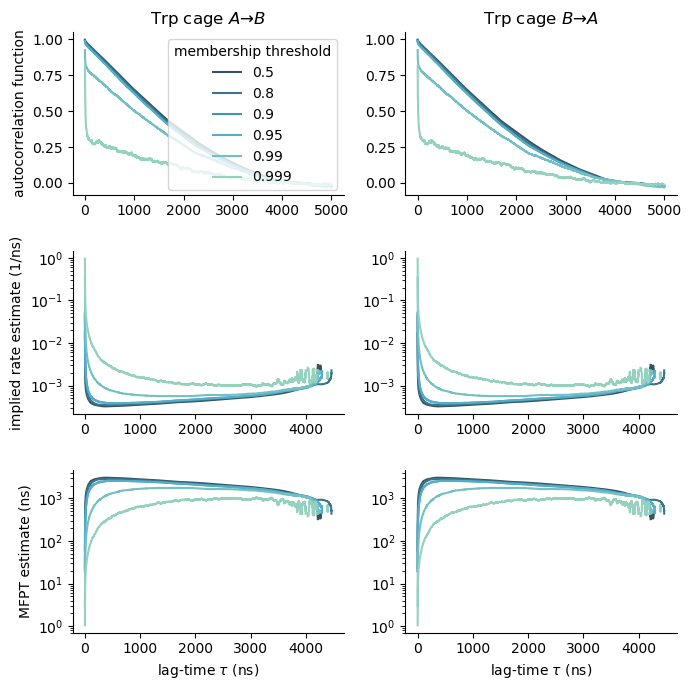

In [154]:
def plot_trpcage(thresholds):
    
    thresholds, tval, Cdts, kim_ts = get_rate_estimates_at_membership_thresholds(
        dtraj=trpcage_dtrajs[0],
        A_membs=trpcage_membs[:,0],
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )

    thresholds_rev, tval_rev, Cdts_rev, kim_ts_rev = get_rate_estimates_at_membership_thresholds(
        dtraj=trpcage_dtrajs[0],
        A_membs=trpcage_membs[:,0],
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )
    
    ## ACFs
    # ACF A->B
    ax1 = plt.subplot(3,2,1)
    remove_top_right_spines(ax1)
    for i, Cdt in enumerate(Cdts):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.ylim(0,1)
    plt.ylabel('autocorrelation function')
    #plt.xscale('log')
   # plt.yscale('log')
    plt.title(r'Trp cage $A \to B$')
    plt.legend(title='membership threshold', loc='best')
    
    # ACF B->A
    ax2 = plt.subplot(3,2,2)
    remove_top_right_spines(ax2)
    for i, Cdt in enumerate(Cdts_rev):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.ylim(0,1)
    #plt.ylabel('implied rate estimate (1/ns)')
    plt.title(r'Trp cage $B \to A$')
    #plt.xscale('log')
    #plt.yscale('log')
   # plt.legend(title='membership threshold')
    
    ## RATES
    # rate A->B
    ax1 = plt.subplot(3,2,3)
    remove_top_right_spines(ax1)
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    y_rate_min = kim_t[-1]
    y_rate_max = kim_t[1000]
    #plt.ylim(y_rate_min,y_rate_max)
    plt.ylabel('implied rate estimate (1/ns)')
    #plt.xscale('log')
    plt.yscale('log')
    #plt.title(r'chignolin $A \to B$')
    #plt.legend(title='membership threshold')
    
    # rate B->A
    ax2 = plt.subplot(3,2,4)
    remove_top_right_spines(ax2)
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.ylim(y_rate_min,y_rate_max)
    #plt.ylabel('implied rate estimate (1/ns)')
    #plt.xscale('log')
    plt.yscale('log')
    #plt.title(r'chignolin $B \to A$')
   # plt.legend(title='membership threshold')
    
    ## MFPTs
    # MFPT A->B
    ax3 = plt.subplot(3,2,5)
    remove_top_right_spines(ax3)
    
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylabel('MFPT estimate (ns)')
    #plt.xscale('log')
    plt.yscale('log')
    #plt.legend(title='membership threshold')
    
     # MFPT B->A
    ax4 = plt.subplot(3,2,6)
    remove_top_right_spines(ax4)
    
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.xscale('log')
    plt.yscale('log')
    #plt.ylabel('MFPT estimate (ns)')
    #plt.legend(title='membership threshold', loc=(1,0))
    plt.tight_layout()
    
plt.figure(figsize=(7,7))
plot_trpcage(thresholds)
plt.savefig('trpcage_acf_based_rate_estimates.pdf', bbox_inches='tight')
plt.savefig('trpcage_acf_based_rate_estimates.png', dpi=300, bbox_inches='tight')

 67%|██████▋   | 4/6 [00:06<00:03,  1.51s/it]/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
100%|██████████| 6/6 [00:07<00:00,  1.10s/it]


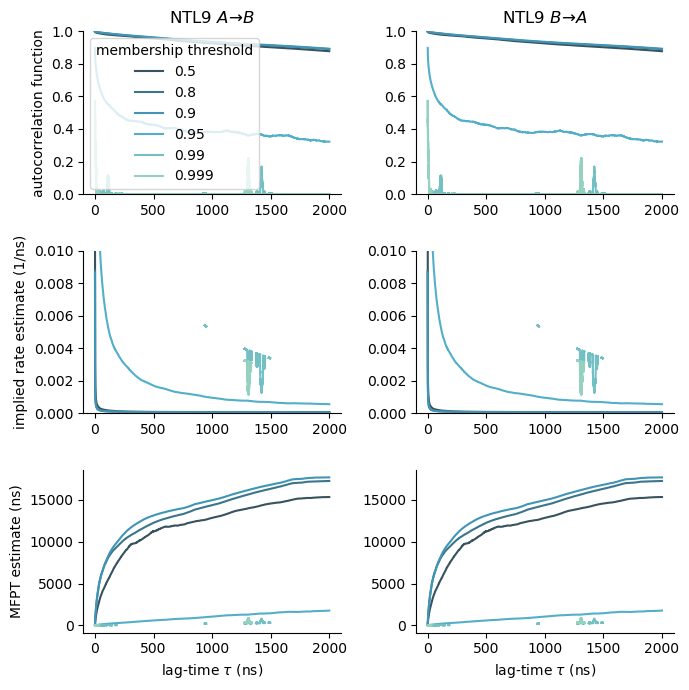

In [129]:
def plot_ntl9(thresholds):
    
    thresholds, tval, Cdts, kim_ts = get_rate_estimates_at_membership_thresholds(
        dtraj=ntl9_dtrajs[0],
        A_membs=ntl9_membs[:,0],
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )

    thresholds_rev, tval_rev, Cdts_rev, kim_ts_rev = get_rate_estimates_at_membership_thresholds(
        dtraj=ntl9_dtrajs[0],
        A_membs=ntl9_membs[:,0],
        thresholds=thresholds,
        dt=dt / unit.nanoseconds,
        tmax=max_lag_ind,
    )
    
    ## ACFs
    # ACF A->B
    ax1 = plt.subplot(3,2,1)
    remove_top_right_spines(ax1)
    for i, Cdt in enumerate(Cdts):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,1)
    plt.ylabel('autocorrelation function')
    plt.title(r'NTL9 $A \to B$')
    plt.legend(title='membership threshold', loc='best')
    
    # ACF B->A
    ax2 = plt.subplot(3,2,2, sharey=ax1)
    remove_top_right_spines(ax2)
    for i, Cdt in enumerate(Cdts_rev):
        plt.plot(tval, Cdt[1:], label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,1)
    #plt.ylabel('implied rate estimate (1/ns)')
    plt.title(r'NTL9 $B \to A$')
   # plt.legend(title='membership threshold')
    
    ## RATES
    # rate A->B
    ax1 = plt.subplot(3,2,3)
    remove_top_right_spines(ax1)
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    y_max_rate = 0.01
    plt.ylim(0,y_max_rate)
    plt.ylabel('implied rate estimate (1/ns)')
    #plt.title(r'chignolin $A \to B$')
    #plt.legend(title='membership threshold')
    
    # rate B->A
    ax2 = plt.subplot(3,2,4)
    remove_top_right_spines(ax2)
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, kim_t, label=thresholds[i], c=colors[i])
    #plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylim(0,y_max_rate)
    #plt.ylabel('implied rate estimate (1/ns)')
    #plt.title(r'chignolin $B \to A$')
   # plt.legend(title='membership threshold')
    
    ## MFPTs
    # MFPT A->B
    ax3 = plt.subplot(3,2,5)
    remove_top_right_spines(ax3)
    
    for i, kim_t in enumerate(kim_ts):
        plt.plot(tval, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    plt.ylabel('MFPT estimate (ns)')
    #plt.legend(title='membership threshold')
    
     # MFPT A->B
    ax4 = plt.subplot(3,2,6)
    remove_top_right_spines(ax4)
    
    for i, kim_t in enumerate(kim_ts_rev):
        plt.plot(tval_rev, 1/kim_t, label=thresholds[i], c=colors[i])
    plt.xlabel(r'lag-time $\tau$ (ns)')
    #plt.ylabel('MFPT estimate (ns)')
    #plt.legend(title='membership threshold', loc=(1,0))
    plt.tight_layout()
    
plt.figure(figsize=(7,7))
plot_ntl9(thresholds)
plt.savefig('ntl9_acf_based_rate_estimates.pdf', bbox_inches='tight')

In [117]:
Cdts

[array([ 1.        ,  0.99011079,  0.98867203, ..., -0.06736499,
        -0.06736551, -0.06743163]),
 array([ 1.        ,  0.98123489,  0.97763094, ..., -0.06017283,
        -0.06013917, -0.06023072]),
 array([ 1.        ,  0.87543009,  0.85973687, ..., -0.04596252,
        -0.04581819, -0.04606854]),
 array([ 1.        ,  0.49722556,  0.43237059, ..., -0.00487126,
        -0.00381354, -0.0044747 ]),
 array([1.        , 0.69864788, 0.63107851, ..., 0.00472929, 0.00328395,
        0.00328394]),
 array([ 1.00000000e+00,  6.19363970e-01,  5.48159536e-01, ...,
         5.84524511e-04, -2.94546519e-04, -2.94550514e-04])]

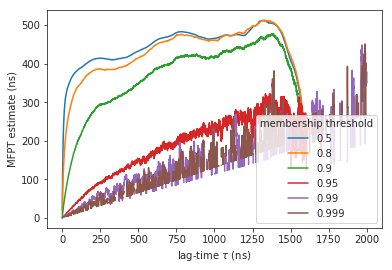

In [111]:
for i, kim_t in enumerate(kim_ts):
    plt.plot(tval, 1/kim_t, label=thresholds[i])
plt.xlabel(r'lag-time $\tau$ (ns)')
plt.ylabel('MFPT estimate (ns)')
plt.legend(title='membership threshold')

In [211]:
i = len(kim_ts[0]) - 1
tval[i]

200.0

In [212]:
t = tval[i]

In [46]:
def remove_top_right_spines(ax):
    """Aesthetic tweak of matplotlib axes"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

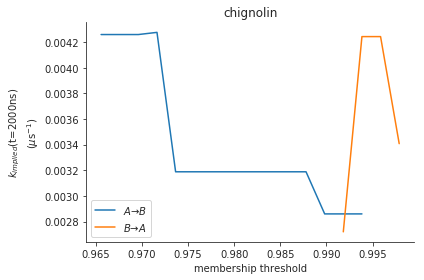

In [47]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)


t = tval[-1]

plt.plot(thresholds, [k[-1] for k in kim_ts], label=r'$A \to B$')
plt.plot(thresholds_rev, [k[-1] for k in kim_ts_rev], label=r'$B \to A$')
plt.legend()
plt.xlabel('membership threshold')
plt.ylabel(r'$k_{implied}$' +'(t={}ns)'.format(int(t)) + '\n($\mu$s$^{-1}$)')
plt.title('chignolin')
#plt.ylim(0,5)


plt.tight_layout()
plt.savefig('rate-estimates-chignolin.pdf', bbox_inches='tight')
plt.savefig('rate-estimates-chignolin.png', dpi=300, bbox_inches='tight')

In [49]:
ind_rev = np.argmin(np.abs(thresholds_rev - 0.5))
kim_ts_rev[ind_rev][-1]

nan

In [40]:
ind = np.argmin(np.abs(thresholds - 0.5))
kim_ts[ind][-1]

nan

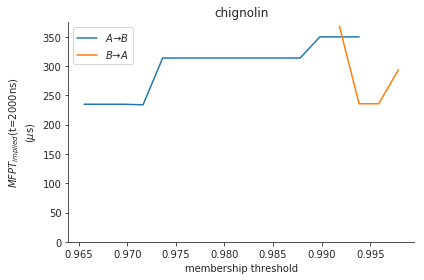

In [41]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)

plt.plot(thresholds, [1/k[-1] for k in kim_ts], label=r'$A \to B$')
plt.plot(thresholds_rev, [1/k[-1] for k in kim_ts_rev], label=r'$B \to A$')
plt.legend()
plt.xlabel('membership threshold')
plt.ylabel(r'$MFPT_{implied}$' +'(t={}ns)'.format(int(t)) + '\n($\mu$s)')
plt.title('chignolin')
plt.ylim(0,)


plt.tight_layout()
plt.savefig('MFPT-estimates-chignolin.pdf', bbox_inches='tight')
plt.savefig('MFPT-estimates-chignolin.png', dpi=300, bbox_inches='tight')

# Plot dependence on lag-time instead?

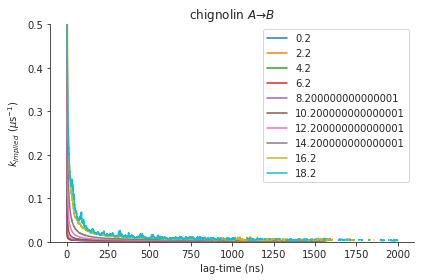

In [58]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)


for ind in range(len(kim_ts))[::10]:


    plt.plot(tval, kim_ts[ind], label=tval[ind])
#plt.plot(tval_rev, kim_ts_rev[ind], label=r'$B \to A$')
plt.legend()
plt.xlabel('lag-time (ns)')
plt.ylabel(r'$k_{implied}$' +' ($\mu$s$^{-1}$)')
plt.title(r'chignolin $A \to B$')
plt.ylim(0,0.5)


plt.tight_layout()
plt.savefig('rate-estimates-chignolin-vs-lagtime.pdf', bbox_inches='tight')
plt.savefig('rate-estimates-chignolin-vs-lagtime.png', dpi=300, bbox_inches='tight')

In [241]:
kim_ts[0].shape

(100000,)

In [135]:
len(kim_ts[0])

1000

In [163]:
[k[-1] for k in kim_ts][len(thresholds[::2])], kim_ts_rev[len(thresholds_rev[::2])][-1]

(0.004579419895629637, 0.004276572957463195)

In [158]:
kim_ts_rev[len(thresholds[::2])][-1]

0.004276572957463195

In [245]:
thresholds, tval, Cdts, kim_ts = get_rate_estimates_at_membership_thresholds(
    dtraj=trpcage_dtraj,
    A_membs=trpcage_membs[:,0],
    dt=0.2,
    tmax=10000,
)

thresholds_rev, tval_rev, Cdts_rev, kim_ts_rev = get_rate_estimates_at_membership_thresholds(
    dtraj=trpcage_dtraj,
    A_membs=trpcage_membs[:,-1],
    dt=0.2,
    tmax=10000,
)

  0%|          | 0/99 [00:00<?, ?it/s]/Users/joshuafass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
100%|██████████| 99/99 [00:24<00:00,  4.07it/s]


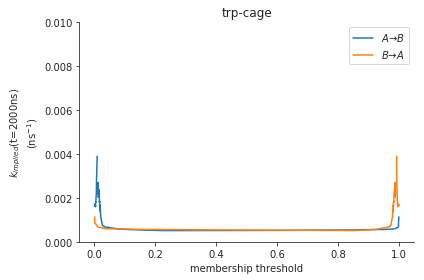

In [246]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)


i = -1
t = tval[i]



plt.plot(thresholds, [k[i] for k in kim_ts], label=r'$A \to B$')
plt.plot(thresholds_rev, [k[i] for k in kim_ts_rev], label=r'$B \to A$')
plt.legend()
plt.xlabel('membership threshold')
plt.ylabel(r'$k_{implied}$' +'(t={}ns)'.format(int(tval[i])) + '\n(ns$^{-1}$)')
plt.title('trp-cage')
plt.ylim(0,0.01)


plt.tight_layout()
plt.savefig('rate-estimates-trpcage_t={}.pdf'.format(int(t)), bbox_inches='tight')
plt.savefig('rate-estimates-trpcage_t={}.png'.format(int(t)), dpi=300, bbox_inches='tight')

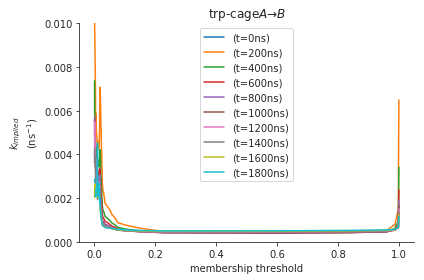

In [248]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)



for i in range(len(tval))[::1000]:
    t = tval[i]
    plt.plot(thresholds, [k[i] for k in kim_ts], label='(t={}ns)'.format(int(tval[i])))
#plt.plot(thresholds_rev, [k[i] for k in kim_ts_rev], label=r'$B \to A$')
plt.legend()
plt.xlabel('membership threshold')
plt.ylabel(r'$k_{implied}$' + '\n(ns$^{-1}$)')
plt.title('trp-cage' + r'$A \to B$')
plt.ylim(0,0.01)


plt.tight_layout()
plt.savefig('rate-estimates-trpcage_t={}.pdf'.format(int(t)), bbox_inches='tight')
plt.savefig('rate-estimates-trpcage_t={}.png'.format(int(t)), dpi=300, bbox_inches='tight')

In [249]:
ind = np.argmin(np.abs(thresholds - 0.5))
ind

92

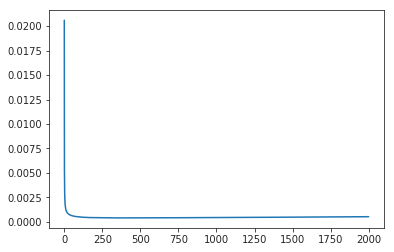

In [251]:
plt.plot(tval, kim_ts[ind])

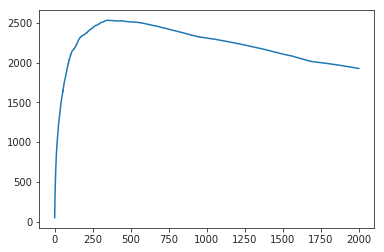

In [252]:
plt.plot(tval, 1/kim_ts[ind])

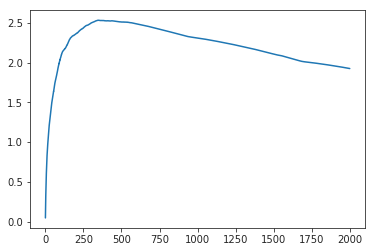

In [253]:
plt.plot(tval, (1/kim_ts[ind]) / 1000)

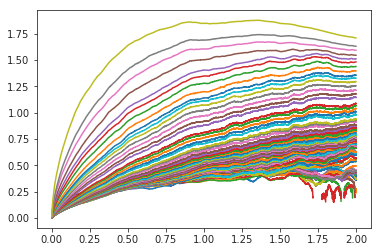

In [258]:
for i in range(len(kim_ts))[10:-10]:
    plt.plot(tval / 1000, (1/kim_ts[i]) / 1000)

In [259]:
import pyemma

In [262]:
msm = pyemma.msm.estimate_markov_model([chignolin_dtraj], lag=100)

In [265]:
ind_range = np.arange(len(chignolin_membs))
A_inds = ind_range[chignolin_membs[:,0] > 0.5]
B_inds = ind_range[chignolin_membs[:,1] > 0.5]

In [266]:
msm.mfpt(A_inds, B_inds)

2207.0121466065666